## import library

In [200]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import sqlalchemy as db
import pymysql
import mysql.connector

In [201]:
con = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='papamama',
    database='world'
)

## 1.A

In [202]:
dfcity = pd.read_sql('select * from city', con)

In [203]:
dfcountry = pd.read_sql('select * from country', con)

In [204]:
dfcl = pd.read_sql('select * from countrylanguage', con)

In [205]:
dfcountry.isna().any()

Code              False
Name              False
Continent         False
Region            False
SurfaceArea       False
IndepYear          True
Population        False
LifeExpectancy     True
GNP               False
GNPOld             True
LocalName         False
GovernmentForm    False
HeadOfState        True
Capital            True
Code2             False
dtype: bool

In [206]:
dfcountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    float64
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    float64
 8   GNP             239 non-null    float64
 9   GNPOld          178 non-null    float64
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     238 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           239 non-null    object 
dtypes: float64(6), int64(1), object(8)
memory usage: 28.1+ KB


In [207]:
df1 = dfcountry.dropna(axis=0)
# axis 0 untuk delete row yang 0
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 2 to 238
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            167 non-null    object 
 1   Name            167 non-null    object 
 2   Continent       167 non-null    object 
 3   Region          167 non-null    object 
 4   SurfaceArea     167 non-null    float64
 5   IndepYear       167 non-null    float64
 6   Population      167 non-null    int64  
 7   LifeExpectancy  167 non-null    float64
 8   GNP             167 non-null    float64
 9   GNPOld          167 non-null    float64
 10  LocalName       167 non-null    object 
 11  GovernmentForm  167 non-null    object 
 12  HeadOfState     167 non-null    object 
 13  Capital         167 non-null    float64
 14  Code2           167 non-null    object 
dtypes: float64(6), int64(1), object(8)
memory usage: 20.9+ KB


In [208]:
df1

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
7,ARE,United Arab Emirates,Asia,Middle East,83600.0,1971.0,2441000,74.1,37966.0,36846.0,Al-Imarat al-´Arabiya al-Muttahida,Emirate Federation,Zayid bin Sultan al-Nahayan,65.0,AE
8,ARG,Argentina,South America,South America,2780400.0,1816.0,37032000,75.1,340238.0,323310.0,Argentina,Federal Republic,Fernando de la Rúa,69.0,AR
9,ARM,Armenia,Asia,Middle East,29800.0,1991.0,3520000,66.4,1813.0,1627.0,Hajastan,Republic,Robert Kotšarjan,126.0,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,WSM,Samoa,Oceania,Polynesia,2831.0,1962.0,180000,69.2,141.0,157.0,Samoa,Parlementary Monarchy,Malietoa Tanumafili II,3169.0,WS
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [209]:
df1[['Name','Continent', 'Region', 'IndepYear', 'Population']].sort_values('Population',ascending=True).head(10)

,Name,Continent,Region,IndepYear,Population
123,Liechtenstein,Europe,Western Europe,1806.0,32300
13,Antigua and Barbuda,North America,Caribbean,1981.0,68000
58,Dominica,North America,Caribbean,1978.0,71000
202,Seychelles,Africa,Eastern Africa,1976.0,77000
212,Tonga,Oceania,Polynesia,1970.0,99000
233,Samoa,Oceania,Polynesia,1962.0,180000
231,Vanuatu,Oceania,Melanesia,1980.0,190000
27,Belize,North America,Central America,1981.0,241000
31,Barbados,North America,Caribbean,1966.0,270000
104,Iceland,Europe,Nordic Countries,1944.0,279000


## 1.B

In [210]:
dfcity

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200
...,...,...,...,...,...
4074,4075,Khan Yunis,PSE,Khan Yunis,123175
4075,4076,Hebron,PSE,Hebron,119401
4076,4077,Jabaliya,PSE,North Gaza,113901
4077,4078,Nablus,PSE,Nablus,100231


In [211]:
citybycc = dfcity.groupby('CountryCode')
citybycc[['CountryCode','Population']].mean().sort_values('Population', ascending=False).head(10)

,Population
CountryCode,
SGP,4017733.0
HKG,1650316.5
URY,1236000.0
GIN,1090610.0
UGA,890800.0
SLE,850000.0
LBR,850000.0
MLI,809552.0
AUS,808119.0


## 1C

In [212]:
dfcl

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9
...,...,...,...,...
979,ZMB,Tongan,F,11.0
980,ZWE,English,T,2.2
981,ZWE,Ndebele,F,16.2
982,ZWE,Nyanja,F,2.2


In [213]:
languagebycc = dfcl.groupby('Language')
languagebycc[['CountryCode']].count().sort_values('CountryCode',ascending = False).head(10)

,CountryCode
Language,
English,60
Arabic,33
Spanish,28
French,25
Chinese,19
German,19
Russian,17
Italian,15
Creole English,14


## 2

In [214]:
continent = dfcountry.groupby('Continent').sum()
continent_desc = continent['Population']
continent_desc

Continent
Africa            784475000
Antarctica                0
Asia             3705025700
Europe            730074600
North America     482993000
Oceania            30401150
South America     345780000
Name: Population, dtype: int64

In [215]:
labels_list = continent_desc.index.unique().tolist()
labels_list

['Africa',
 'Antarctica',
 'Asia',
 'Europe',
 'North America',
 'Oceania',
 'South America']

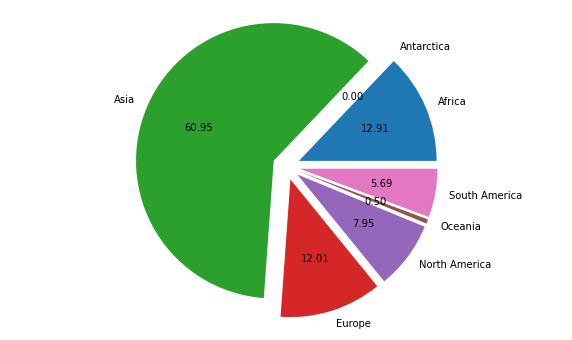

In [216]:
explode_list = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

plt.figure(figsize=(10,6))
plt.pie(continent_desc.to_list(),
        labels= labels_list,
        autopct = '%.2f',
        explode = explode_list)# menampilkan data di pie chart

plt.axis('equal')
plt.show()

- dilihat dari persentase tiap benu, benua penyumbang terbanyak adalah Asia
- persentase populasi manusia yang berada di amerika utara adalah 7.9%

## 3

In [242]:
dfcountry

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,8.280000e+08,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,8038.834951
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5.976000e+09,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,263.028169
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6.648000e+09,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO,516.229228
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,6.320000e+07,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,7900.000000
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,942.314477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6.041000e+09,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE,333.535777
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,1.700000e+10,NaN,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU,1597.744361
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,1.167290e+11,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA,2890.977537
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3.377000e+09,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM,368.306249


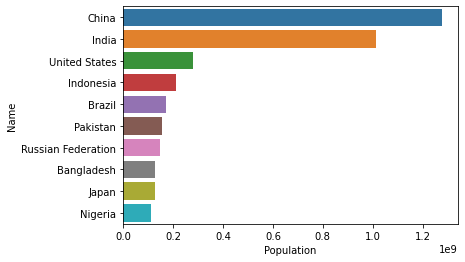

In [243]:
sns.barplot(x='Population', y='Name', data=dfcountry.sort_values('Population', ascending= False).head(10))

- Negara dengan populasi terbanyak adalah China
- Negara yang mejadi peringkat ke 10 dalam horizontal barplot saya adalah Nigeria
- Populasi negara yang berada di urutan ke 3 adalah 278357000

## 4

In [219]:
asia = dfcountry[dfcountry['Continent']== 'Asia']
asia

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
7,ARE,United Arab Emirates,Asia,Middle East,83600.0,1971.0,2441000,74.1,37966.0,36846.0,Al-Imarat al-´Arabiya al-Muttahida,Emirate Federation,Zayid bin Sultan al-Nahayan,65.0,AE
9,ARM,Armenia,Asia,Middle East,29800.0,1991.0,3520000,66.4,1813.0,1627.0,Hajastan,Republic,Robert Kotšarjan,126.0,AM
16,AZE,Azerbaijan,Asia,Middle East,86600.0,1991.0,7734000,62.9,4127.0,4100.0,Azärbaycan,Federal Republic,Heydär Äliyev,144.0,AZ
21,BGD,Bangladesh,Asia,Southern and Central Asia,143998.0,1971.0,129155000,60.2,32852.0,31966.0,Bangladesh,Republic,Shahabuddin Ahmad,150.0,BD
23,BHR,Bahrain,Asia,Middle East,694.0,1971.0,617000,73.0,6366.0,6097.0,Al-Bahrayn,Monarchy (Emirate),Hamad ibn Isa al-Khalifa,149.0,BH
32,BRN,Brunei,Asia,Southeast Asia,5765.0,1984.0,328000,73.6,11705.0,12460.0,Brunei Darussalam,Monarchy (Sultanate),Haji Hassan al-Bolkiah,538.0,BN
33,BTN,Bhutan,Asia,Southern and Central Asia,47000.0,1910.0,2124000,52.4,372.0,383.0,Druk-Yul,Monarchy,Jigme Singye Wangchuk,192.0,BT
41,CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
54,CYP,Cyprus,Asia,Middle East,9251.0,1960.0,754700,76.7,9333.0,8246.0,Kýpros/Kibris,Republic,Glafkos Klerides,2430.0,CY


In [221]:
iqr = asia['LifeExpectancy'].quantile(0.75) - asia['LifeExpectancy'].quantile(0.25)
upper_bound = asia['LifeExpectancy'].quantile(0.75) + 1.5*iqr
lower_bound = asia['LifeExpectancy'].quantile(0.25) - 1.5*iqr
mean = asia.LifeExpectancy.mean()
std = asia.LifeExpectancy.std()
median = asia.LifeExpectancy.median()
print('ini adalah iqr', iqr)
print('ini adalah upper bound', upper_bound)
print('ini adalah lower bound', lower_bound)
print('ini adalah mean', mean)
print('ini adalah std', std)
print('ini adalah std', median)

ini adalah iqr 10.0
ini adalah upper bound 87.7
ini adalah lower bound 47.7
ini adalah mean 67.44117647058825
ini adalah std 8.39652729336571
ini adalah std 68.5


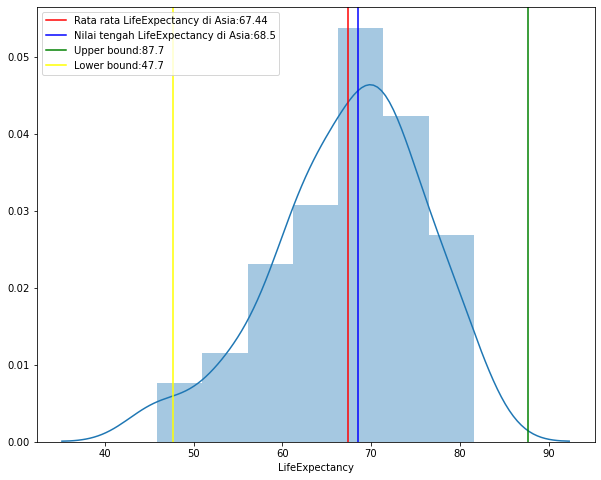

In [222]:
plt.figure(figsize=(10,8))
sns.distplot(asia['LifeExpectancy'])
plt.axvline(mean, label = f'Rata rata LifeExpectancy di Asia:{round(mean,2)}', color='red')
plt.axvline(median, label = f'Nilai tengah LifeExpectancy di Asia:{round(median,2)}', color='blue')
plt.axvline(upper_bound, label = f'Upper bound:{upper_bound}', color='green')
plt.axvline(lower_bound, label = f'Lower bound:{lower_bound}', color='yellow')
plt.legend()
plt.show()

Apakah terdapat negara yang Angka Harapan Hidup-nya berada pada outliers?
- Ya

In [223]:
outliers = asia[(asia['LifeExpectancy'] >= upper_bound) | (asia['LifeExpectancy'] <= lower_bound)]
outliers

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
211,TMP,East Timor,Asia,Southeast Asia,14874.0,NaN,885000,46.0,0.0,NaN,Timor Timur,Administrated by the UN,José Alexandre Gusmão,1522.0,TP


Berdasarkan Skewness Test yang sudah dilakukan, apakah data LifeExpectancy termasuk data normal atau skew?
- data tersebut merupakan data skew karena bisa dilihat dari plot/grafik di atas. Skewness yang bernilai negatif berarti ekor distribusi berada di sebelah kiri, menunjukkan bahwa sebagian besar nilai berada di sisi kanan kurva

## 5

In [224]:
dfcountry['GNP'] = dfcountry['GNP'].apply(lambda x: x*1000000)
dfcountry

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,8.280000e+08,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5.976000e+09,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6.648000e+09,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,6.320000e+07,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6.041000e+09,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,1.700000e+10,NaN,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,1.167290e+11,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3.377000e+09,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [225]:
def gnppercapita(x, y):
    return x/y

In [226]:
dfcountry['GNPperCapita'] = gnppercapita(dfcountry['GNP'],dfcountry['Population'])
dfcountry

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,8.280000e+08,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,8038.834951
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5.976000e+09,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,263.028169
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6.648000e+09,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO,516.229228
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,6.320000e+07,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,7900.000000
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,942.314477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6.041000e+09,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE,333.535777
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,1.700000e+10,NaN,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU,1597.744361
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,1.167290e+11,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA,2890.977537
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3.377000e+09,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM,368.306249


## 6

In [227]:
dfcountry['LifeExpectancy'].corr(dfcountry['GNPperCapita'])

0.5442504429692316

In [228]:
dfcountry['GNPperCapita'].corr(dfcountry['LifeExpectancy'])

0.5442504429692316

In [229]:
iqr_le = dfcountry['LifeExpectancy'].quantile(0.75) - dfcountry['LifeExpectancy'].quantile(0.25)
upper_bound_le = dfcountry['LifeExpectancy'].quantile(0.75) + 1.5*iqr
lower_bound_le = dfcountry['LifeExpectancy'].quantile(0.25) - 1.5*iqr

iqr_gnp = dfcountry['GNPperCapita'].quantile(0.75) - dfcountry['GNPperCapita'].quantile(0.25)
upper_bound_gnp = dfcountry['GNPperCapita'].quantile(0.75) + 1.5*iqr
lower_bound_gnp = dfcountry['GNPperCapita'].quantile(0.25) - 1.5*iqr

In [230]:
print(iqr_le)
print(iqr_gnp)

15.199999999999996
7484.54839726594


In [231]:
print(upper_bound_le)
print(upper_bound_gnp)

90.5
7891.315789473684


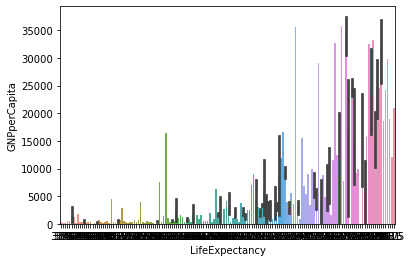

In [232]:
sns.barplot(x='LifeExpectancy', y='GNPperCapita', data = dfcountry)
plt.show()

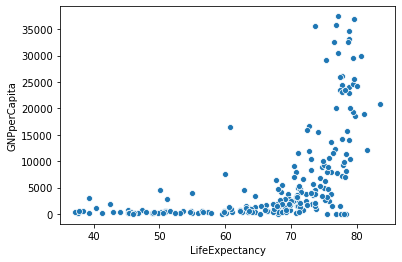

In [233]:
sns.scatterplot(x='LifeExpectancy', y='GNPperCapita', data = dfcountry)
plt.show()

In [234]:
conbygnp = dfcountry.groupby('Continent')
conbygnp[['GNPperCapita']].sum().sort_values('GNPperCapita',ascending=False).head(10)

,GNPperCapita
Continent,
Europe,620886.485885
North America,290303.652159
Asia,282200.402298
Oceania,103107.458298
Africa,71838.862205
South America,44470.167729
Antarctica,0.000000


In [235]:
dfcountry[dfcountry['GNPperCapita'] ==  dfcountry['GNPperCapita'].max()]

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
127,LUX,Luxembourg,Europe,Western Europe,2586.0,1867.0,435700,77.1,1.632100e+10,15519.0,Luxembourg/Lëtzebuerg,Constitutional Monarchy,Henri,2452.0,LU,37459.260959


Saya setuju karena berdasarkan dua hal :
- yang pertama berdasarkan grafik menunjukan hubungan/korelasi yang baik antar dua variabel
- yang kedua bisa dibuktikan dengan rumus dan dari rumus tersebut juga menghasilkan nilai yang cukup baik yaitu 0.5442504429692322

:'''(dfcountry['LifeExpectancy'].corr(dfcountry['GNPperCapita'])'''


dari data tersebut bahwa benua eropa lah yang mencetak nilai GNPPerCapita tertinggi, dan negara dari Erop juga yang memiliki GNPPerCapita tertinggi juga yaitu Luxembourg dengan nilai 3.745926e+10